# Descriptive Statistics Review

## Before you start:

- Read the README.md file
- Comment as much as you can
- Happy learning!

## Context

![img](./diamonds.jpg)

In this lab we are going to work with data to understand the characteristics of a diamond that are most likely to influence its price. In this first part of the lab, we will explore and clean our data. 

The dataset we will be using is comprised of approximately 54k rows and 11 different columns. As always, a row represents a single observation (in this case a diamond) and each of the columns represent a different feature of a diamond.

The following codebook was provided together with the dataset to clarify what each column represents:


| Column  | Description  |
|---|---|
| Price  | Price in US dollars (326-18,823)  |
| Carat  | Weight of the diamond (0.2--5.01)  |
| Cut  | Quality of the cut (Fair, Good, Very Good, Premium, Ideal)  |
| Color  | Diamond colour, from J (worst) to D (best)  |
| Clarity  | A measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))   |
| x  | Length in mm (0--10.74)  |
| y  | Width in mm (0--58.9)  |
| z  | Depth in mm (0--31.8)  |
| Depth  | Total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)  |
| Table  | Width of top of diamond relative to widest point (43--95)  |

## Libraries
Pandas and numpy will be needed for the analysis of the data. Don't worry about the seaborn and matplotlib import at the moment, you will learn more about them next week, but we will be using some of their functionalities.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

First import the data from the .csv file provided and assign it to a variable named `diamonds` and drop the column with the index.

In [5]:
#your code here
diamonds = pd.read_csv('../data/diamonds.csv', index_col = 0, sep = ',')


# 1. Taking the first look at the data.
Let's see how the data looks by using pandas methods like `head()`, `info()` and `describe()`. 

**First, use the `head` method.**

In [6]:
#your code here
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


We can see the first 5 rows of the dataset using the `head` method. This by itself doesn't tell us much about the data that we have, but we can have a first look at the features (columns) and some of the values that each one takes.

**What do you see? Make some comments about the values you see in each column, comparing them with the codebook. Is that what you would expect for these variables?**

In [ ]:
#your code here
'''!!!'''

It is very important to know the amount of data we have, because everything will depend on that, from the quality of the analysis to the choice of our infrastracture.

**Check the shape of the data**

In [7]:
#your code here
diamonds.shape

(53940, 10)

The `clarity` column is confusing because we are not diamond experts. Let's create a new column with a new scale that is more understandable for us.

**Create a new column with numbers from 0 to 7. The lowest would be 0 with value `I1` and the greatest 7 with value `IF`**

In [19]:
#your code here

diamonds['clarity scale'] = diamonds['clarity'] # creating a copy the column in order to replace the values
scale = {"I1": 0, "SI2": 1,"SI1": 2,"VS2": 3,"VS1": 4,"VVS2": 5, "VVS1": 6,"IF": 7} # replacement dict
diamonds['clarity scale'].replace(scale, inplace=True)

It makes sense to do the same with the `color` column.

**Do the same with values from 0 to 6. Read the codebook to see the match**

In [20]:
#your code here
diamonds['color scale'] = diamonds['color'] # creating a copy the column in order to replace the values
scale = {"J": 0, "I": 1, "H": 2,"G": 3,"F": 4,"E": 5, "D": 6} # replacement dict
diamonds['color scale'].replace(scale, inplace=True)


With the `info` method, we can see the features of the dataset, and the amount of observations (rows) that have a non-null value and the types of the features. 

**Now use the `info` method and comparing with the shape, comment on what you see**

In [21]:
#your code here
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 12 columns):
carat            53940 non-null float64
cut              53940 non-null object
color            53940 non-null object
clarity          53940 non-null object
depth            53940 non-null float64
table            53940 non-null float64
price            53940 non-null int64
x                53940 non-null float64
y                53940 non-null float64
z                53932 non-null float64
color scale      53940 non-null int64
clarity scale    53940 non-null int64
dtypes: float64(6), int64(3), object(3)
memory usage: 7.8+ MB


In the last line of the info output, you have some information about the types of the columns. As you know, it is a good idea to check if the types of each column is what you expect. If a column has the right type, we will be able to do all the operations that we want to do. 

For instance, if we have a column that is a `date` with a `string` format, we will have the data but we won't be able to do a simple operation, such as format the date the way that we would like.

Changing the data type to the one we needs can help us to solve a lot of problems in our data.

**Check the types of each column and comment if it matches with the expected**

In [22]:
#your code here
diamonds.dtypes

carat            float64
cut               object
color             object
clarity           object
depth            float64
table            float64
price              int64
x                float64
y                float64
z                float64
color scale        int64
clarity scale      int64
dtype: object

# 2. A deeper look: checking the basic statistics.

The `describe` method gives us an overview of our data. From here we can see all the descriptive metrics for our variables.

**Use the `describe` method and comment on what you see**

In [23]:
#your code and comments here
diamonds.describe()

,carat,depth,table,price,x,y,z,color scale,clarity scale
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53932.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.540265,3.405803,3.051020
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.702667,1.701105,1.647136
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,1.070000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000,2.000000,2.000000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,3.000000,3.000000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000,5.000000,4.000000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,6.000000,7.000000


You have probably noticed that the columns x, y and z have a minimum value of 0. This means that there are one or more rows (or observations) in our dataset that are supposedly representing a diamond that has lenght, width or depth of 0. Considering that we're talking about a physical object, this is impossible!

Now let's proceed to check the rows that have a value of 0 in any of the x, y or z columns. By doing this we want to check if the data we are missing can be obtained using the data that we do have.

**Check the columns with `x`, `y` and `z` with value 0 in all of them and comment what you see**

In [45]:
#your code here
diamonds[(diamonds['x'] == 0) | (diamonds['y'] == 0) | (diamonds['z'] == 0)]

,carat,cut,color,clarity,depth,table,price,x,y,z,color scale,clarity scale
11183,1.07,Ideal,F,SI2,61.6,56.0,4954,0.0,6.62,NaN,4,1
11964,1.00,Very Good,H,VS2,63.3,53.0,5139,0.0,0.00,NaN,2,3
15952,1.14,Fair,G,VS1,57.5,67.0,6381,0.0,0.00,NaN,3,4
24521,1.56,Ideal,G,VS2,62.2,54.0,12800,0.0,0.00,NaN,3,3
26244,1.20,Premium,D,VVS1,62.1,59.0,15686,0.0,0.00,NaN,6,6
27430,2.25,Premium,H,SI2,62.8,59.0,18034,0.0,0.00,NaN,2,1
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.00,NaN,4,1
49558,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.00,NaN,4,1


As you can see, we have 20 rows that have a value of 0 in some or all the aforementioned columns.
Most of them (12) are missing the z value, which we can obtain using the columns depth, x and y. 

20 rows with issues represent just 0.03% of our data (20 out of 53940) so it wouldn't be a big deal to remove them. Still, lets try to keep all the data we have. 

For those 12 rows, we will create a function that applies the formula given in the codebook and get the value of z. We will drop the other rows (8), since they are missing all 3 values or 2 of them.

**Create a function named `calculate_z` that applies the function in the codebook to one single row you give to the function**

In [10]:
#your code here

def calculate_z(n): 
    return (n['depth']*(n['x'] + n['y']))/200



**Apply it just to the rows with incorrect values**

In [11]:
#your code here

diamonds.loc[(diamonds['z'] == 0) & 
             (diamonds['x'] > 0) & 
             (diamonds['y'] > 0), 'z'] = calculate_z(diamonds)
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z,color scale
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,5
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,5
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,5
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,1
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0
6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,0
7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47,1
8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53,2
9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49,5
10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39,2


If we leave the other 8 values as they are, it would negatively affect our analysis, because these are data that do not make logical sense. Therefore it is better to consider those values as NaN values, since they are probably the result of a mistake or error during process of measuring and storing these values in a dataset.

To replace them we can use the pandas .replace() method and np.NaN.

**Replace the zero values in the `z` column for a NaN**

In [24]:
#your code here

#your code here
diamonds.loc[(diamonds['z'] == 0),'z'] = np.nan
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z,color scale,clarity scale
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,5,1
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,5,2
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,5,4
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,1,3
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0,1
6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,0,5
7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47,1,6
8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53,2,2
9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49,5,3
10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39,2,4


----
# Bonus: check the new z values
Since we need to be 100% sure of our data, let's create a function that validates our z. To do so, we will use the same formula, but this time we will calculate the value of depth with the new value assigned to z.

**Create a function named `validate_z` that compares the `z`  in cells above with the one thrown by the formula and run it with the rows you changed in the cells above**

In [ ]:
#your code here

Let's check the data again with the `describe()` method.

The minimum value for x, y and z should now be a positive number, as it should be for the physical measurements of an object.

Let's finish by checking for NaN values in the data. Since we introduced them ourselves using 'replace', we will surely find some, but there may be more that are unrelated to the x, y and z columns. Checking NaNs is a fundamental part of data cleaning and it's always better to do this kind of operations before proceeding with analysis.

**Check how many NaNs do you have, comment what you would do with those values, and then do so**

In [ ]:
#your code here

# 3. Checking for outliers
Now we are going to revisit the summary table to check for outliers.

**Use the `describe` method again and comment on what you see. After that, check if you have any outliers** 

In [25]:
#your code here
diamonds.describe()

,carat,depth,table,price,x,y,z,color scale,clarity scale
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53932.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.540265,3.405803,3.051020
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.702667,1.701105,1.647136
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,1.070000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000,2.000000,2.000000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,3.000000,3.000000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000,5.000000,4.000000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,6.000000,7.000000


In [ ]:
#your comments here
'''The maximum price is more than 3 times higher then the 75 percentile and the maximum weight is 5 times higher'''

To manage these outliers, we are going to filter our DataFrame, we're going to take all the values that have a price higher than the 75th percentile.

**Look for that quantile and filter the dataframe to clearly see the outliers. What do you think?**

In [31]:
#your code here

diamonds[(diamonds['price'] > diamonds['price'].quantile(0.75))]


,carat,cut,color,clarity,depth,table,price,x,y,z,color scale,clarity scale
12766,1.07,Ideal,E,SI2,62.2,55.0,5325,6.54,6.58,4.08000,5,1
12767,1.11,Ideal,H,SI1,60.6,59.0,5325,6.75,6.71,4.08000,2,2
12768,1.14,Premium,G,SI1,62.2,58.0,5326,6.64,6.70,4.15000,3,2
12769,1.07,Premium,H,VS2,62.1,59.0,5327,6.52,6.56,4.06000,2,3
12770,1.33,Very Good,J,SI1,64.0,53.0,5327,6.93,7.01,4.46000,0,2
12771,1.08,Ideal,F,SI1,62.7,57.0,5327,6.52,6.49,4.08000,4,2
12772,1.51,Premium,J,SI2,59.7,62.0,5327,7.46,7.42,4.44000,0,1
12773,1.06,Very Good,E,SI1,59.6,57.0,5328,6.62,6.67,3.96000,5,2
12774,1.11,Ideal,I,SI1,61.9,55.0,5329,6.65,6.66,4.12000,1,2
12775,1.12,Premium,D,SI2,61.2,60.0,5329,6.67,6.63,4.07000,6,1


In [ ]:
'''The number of price outliers is significant, alsmost 20%, thus making them not really outliers. '''

Our dataset is really big and the outliers are really far apart from the rest of the values. To see this more clearly we will use a boxplot, which plots the median, 25th and 75th quartile, the maximum and minimum, as well as any outliers.

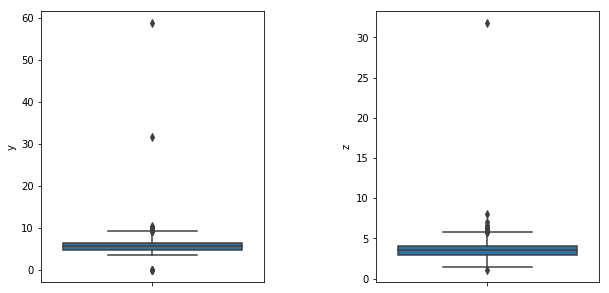

In [27]:
#Run this code
fig, ax = plt.subplots(1,2, figsize=(10, 5))
sns.boxplot(y=diamonds.y, ax=ax[0])
sns.boxplot(y=diamonds.z, ax=ax[1])
plt.subplots_adjust(wspace=0.5)

Now we can see that all the values are within an acceptable range, but we have 2 big outliers in y and 1 in z. Now we know that our max values for y should be around 10 and the values for z should be around 6, so let's filter our dataset to find values higher than 10 in it.


In [32]:
#your code here
diamonds[(diamonds['z'] > 10)]

,carat,cut,color,clarity,depth,table,price,x,y,z,color scale,clarity scale
48411,0.51,Very Good,E,VS1,61.8,54.7,1970,5.12,5.15,31.8,5,4


Now that we have found the outlier, let's use the function we defined earlier to correct this value. First, we need to change the value to 0 (because that's how we defined the function before) and then we will apply it.

**Apply `calculate_z` for the row with the outlier**

In [46]:
#your code here

diamonds.loc[(diamonds['z'] > 10), 'z'] = calculate_z(diamonds)

Let's check if we actually corrected the outlier.

In [36]:
diamonds.loc[[48411], 'z']

48411    3.17343
Name: z, dtype: float64

Cool! Now let's validate our new `z`. We will check if we obtain the same value of depth using our validate function. If the formula applies, this means could approximate the real value of `z`.

**Apply `validate_z` to the row used earlier**

In [ ]:
#your code here

Now let's do the same for `y`. First, let's filter the DataFrame to find the outliers. We said that the maximum values should be around 10, so let's check what are the values above 10.

**Check the values greater than 10 in the `y` column** 

In [50]:
#your code here
diamonds[(diamonds['y'] > 10)]

,carat,cut,color,clarity,depth,table,price,x,y,z,color scale,clarity scale
24068,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,19.278421,8.06,2,1
25999,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.089508,6.17,1,0
27416,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.572977,6.98,0,0
27631,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.195532,6.72,0,0
49190,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,11.419579,5.12,5,4


We can clearly see that the 31.8 in row 49189 is an outlier for the y value. Also, we can see that the 58.9 value for `y` in row 24067 is actually its depth, so it was a mistake when they introduced the data. Let's create a function to fix these outliers.

**Create a function named `calculate_y` to calculate `y` using `z` and `x` the same way you did above**

In [51]:
#your code here
def calculate_y(n):
    return ((n['z'] * 200) / n['depth']) - n['x']

diamonds.loc[(diamonds['y'] > 10), 'y'] = calculate_y(diamonds)


We will check the rows that had an outlier in `y`, to check that the values were changed.

**Check those rows (also validating with your function) and comment what you see**

Now that we have corrected or dropped all of our outliers, lets plot another box plot to double check.

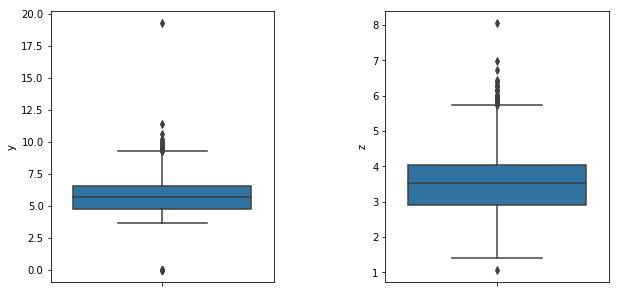

In [52]:
#Run this code
fig, ax = plt.subplots(1,2, figsize=(10, 5))
sns.boxplot(y=diamonds.y, ax=ax[0])
sns.boxplot(y=diamonds.z, ax=ax[1])
plt.subplots_adjust(wspace=0.5)

**What do you think? Are these values more reasonable?**


In [53]:
#your thoughts here

diamonds.describe()

,carat,depth,table,price,x,y,z,color scale,clarity scale
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53932.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.733415,3.539735,3.405803,3.051020
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.115115,0.692051,1.701105,1.647136
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,1.070000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000,2.000000,2.000000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,3.000000,3.000000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000,5.000000,4.000000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,19.278421,8.060000,6.000000,7.000000


**Once you are happy with your cleaning, save the cleaned data and continue to csv. Your new csv should be named ``diamonds_clean``**

In [54]:
#your code here
diamonds.to_csv('../data/diamonds_clean.csv')